<a href="https://colab.research.google.com/github/saidrishya/OCR/blob/master/extreacting_text_from_invoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install translate

     |████████████████████████████████| 92kB 2.7MB/s 
     |████████████████████████████████| 174kB 5.1MB/s 
     |████████████████████████████████| 4.9MB 5.3MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 276kB 29.1MB/s 
     |████████████████████████████████| 337kB 39.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=bdda62319f20c0ee9bce9700a6a71d494ae80c70fa1daafa8049ea0ccd6f20a2
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
ERROR: pytest 3.6.4 has requirement pluggy<0.8,>=0.5, but you'll have pluggy 0.13.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Found existing installation: PyYAML 3.

In [2]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 88kB/s 


In [3]:
import easyocr

In [12]:
reader = easyocr.Reader(['en'], gpu=True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


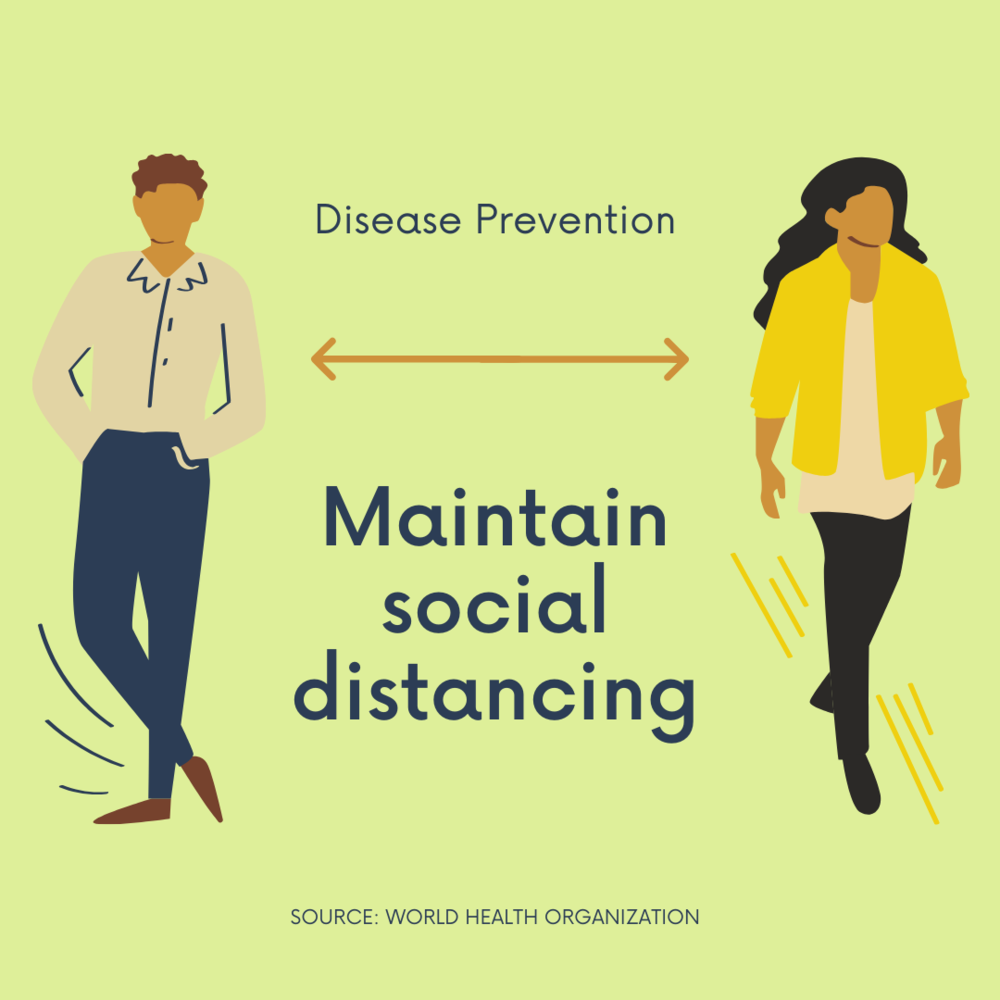

In [13]:
import PIL
from PIL import ImageDraw
image = PIL.Image.open('SocialDistancing.png')
image


In [15]:
bounds = reader.readtext('SocialDistancing.png')

In [22]:
bounds

[([[311, 197], [681, 197], [681, 241], [311, 241]],
  'Disease Prevention',
  0.3180944323539734),
 ([[320, 472], [679, 472], [679, 563], [320, 563]],
  'Maintain',
  0.8495347499847412),
 ([[367, 551], [625, 551], [625, 664], [367, 664]],
  'social',
  0.9257509112358093),
 ([[280, 631], [712, 631], [712, 758], [280, 758]],
  'distancing',
  0.9937056303024292),
 ([[286, 904], [702, 904], [702, 928], [286, 928]],
  'SOURCE: WORLD HEALTH ORGANIZATION',
  0.1286783218383789)]

In [21]:
text = ""
n = len(bounds)
for i in range(0,n):
  for j in range(0, 3):
    if j==1:
      text = text + bounds[i][j] + " "

print(text)

Disease Prevention Maintain social distancing SOURCE: WORLD HEALTH ORGANIZATION 


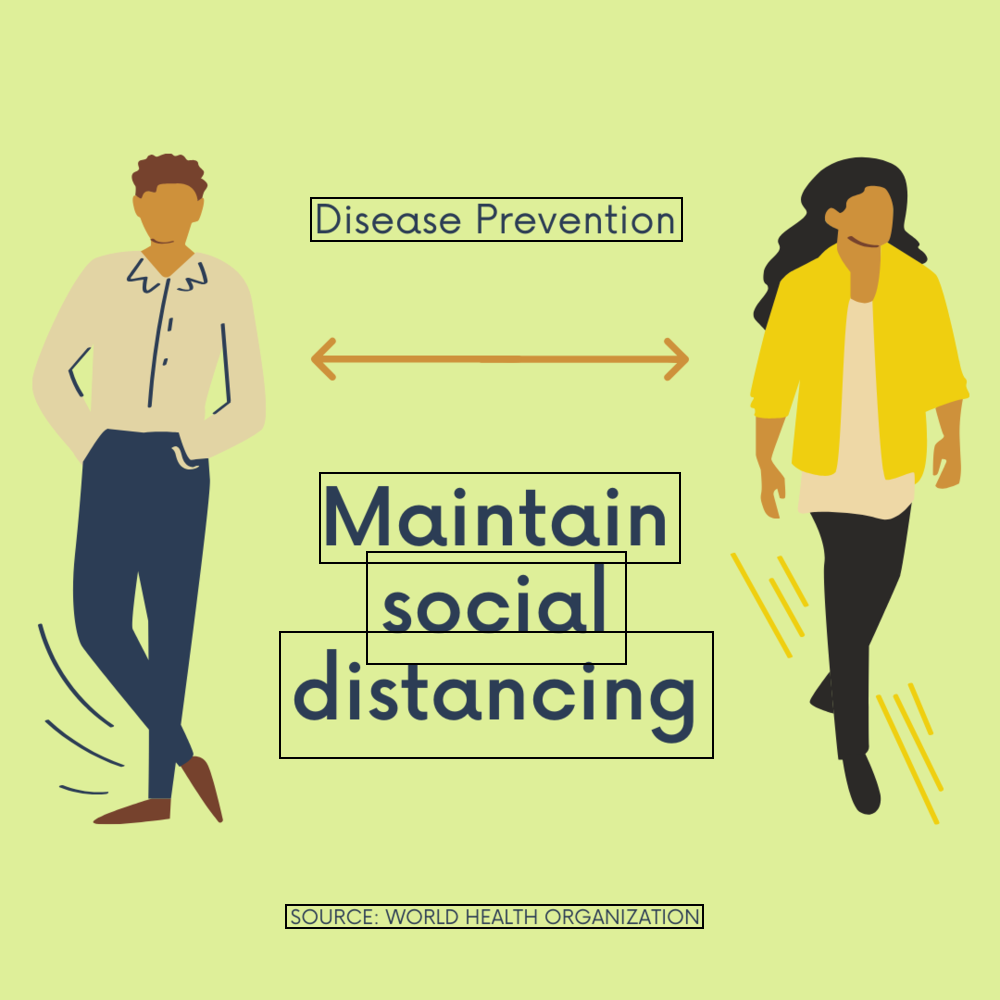

In [23]:
#draw bounding boxes
def draw_boxes(image, bounds, color = "black", width=2):
  draw = ImageDraw.Draw(image)
  for i in bounds:
    p0,p1,p2,p3 = i[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(image, bounds)

In [26]:
from translate import Translator
translator= Translator(to_lang="zh")
translator2 = Translator(to_lang = "German")
translation = translator.translate(text)
translation2 = translator2.translate(text)

In [28]:
print(translation)


疾病预防保持社会疏远来源：世界卫生组织


In [29]:
translation2

'Krankheitsprävention Soziale Entsung bewahren QUELLE: WELT GESUNDHEITSORGANISATION'

In [31]:
bounds = reader.readtext('invoice.png')

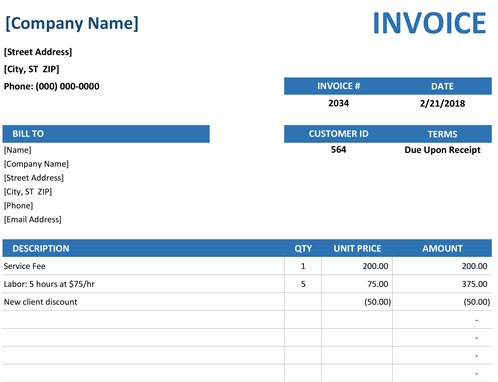

In [32]:
image = PIL.Image.open('invoice.png')
image

Not very accurate. Quality of image plays a huge role here.



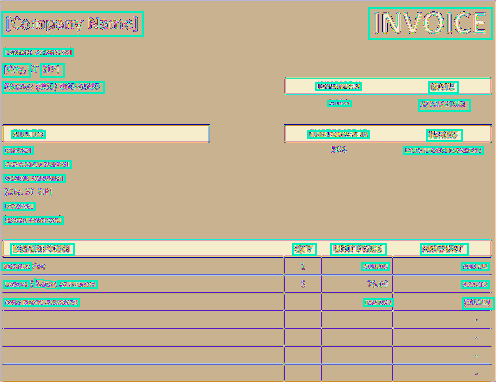

In [33]:
draw_boxes(image, bounds)

In [34]:
len(bounds)

33

In [35]:
for i in bounds:
  print(i[1])

INVOICE
ICompany Name]
itreetnddress
ICity,
ZIP]
Phane: Iaoalaug-aaog
DATE
INyHDlCEh
7]21;3018
alE"=
TERNS
HlLLl0
cuSIOMERID
fasuel
Du uacl lecelat
iuwiual lalie
icit nuurs5
Hrr:na
fniil dnn TIss
DESCRIPTIOV
oTv
UNIT PRICE
AMOUNT
zervici
ILJIJL
zcagu
e4i3
auur:
al75llur
JcL
lsono|
Msuchieut uiiount
rsg.ag


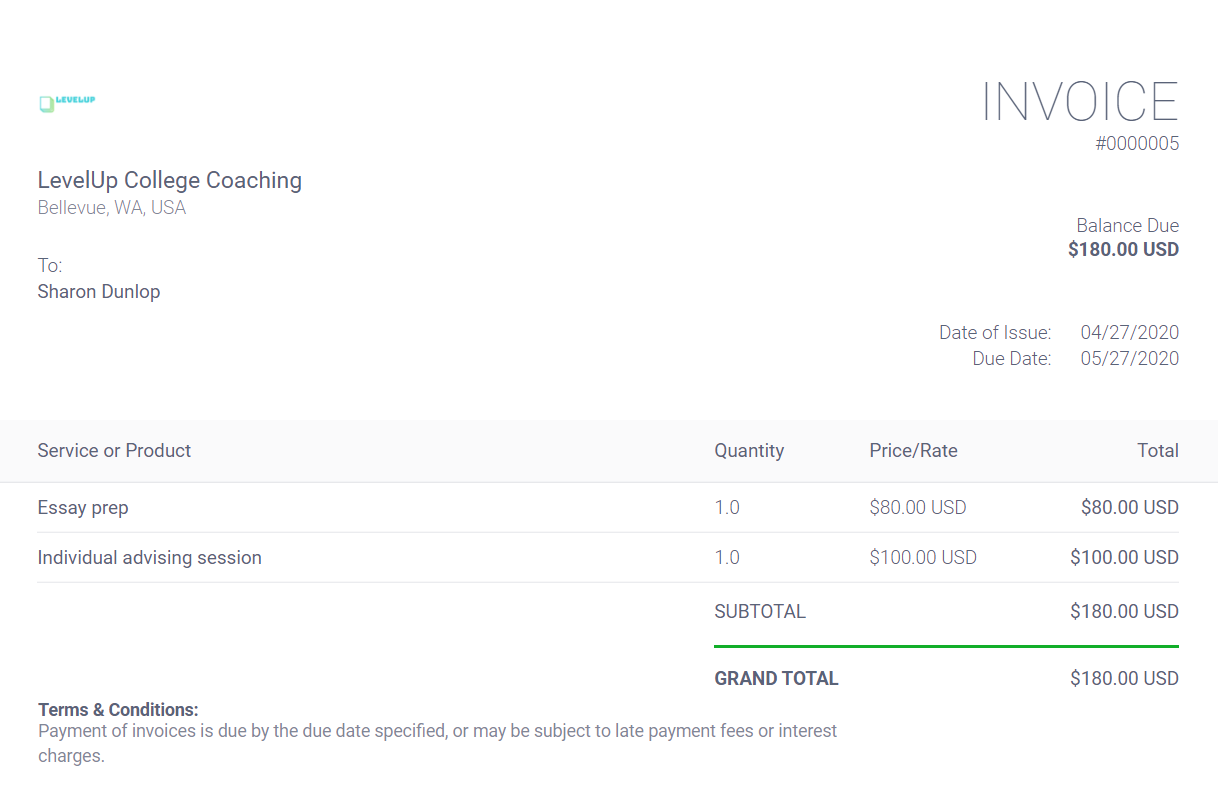

In [36]:
img = PIL.Image.open('i1.png')
img

In [38]:
newb = reader.readtext('i1.png')

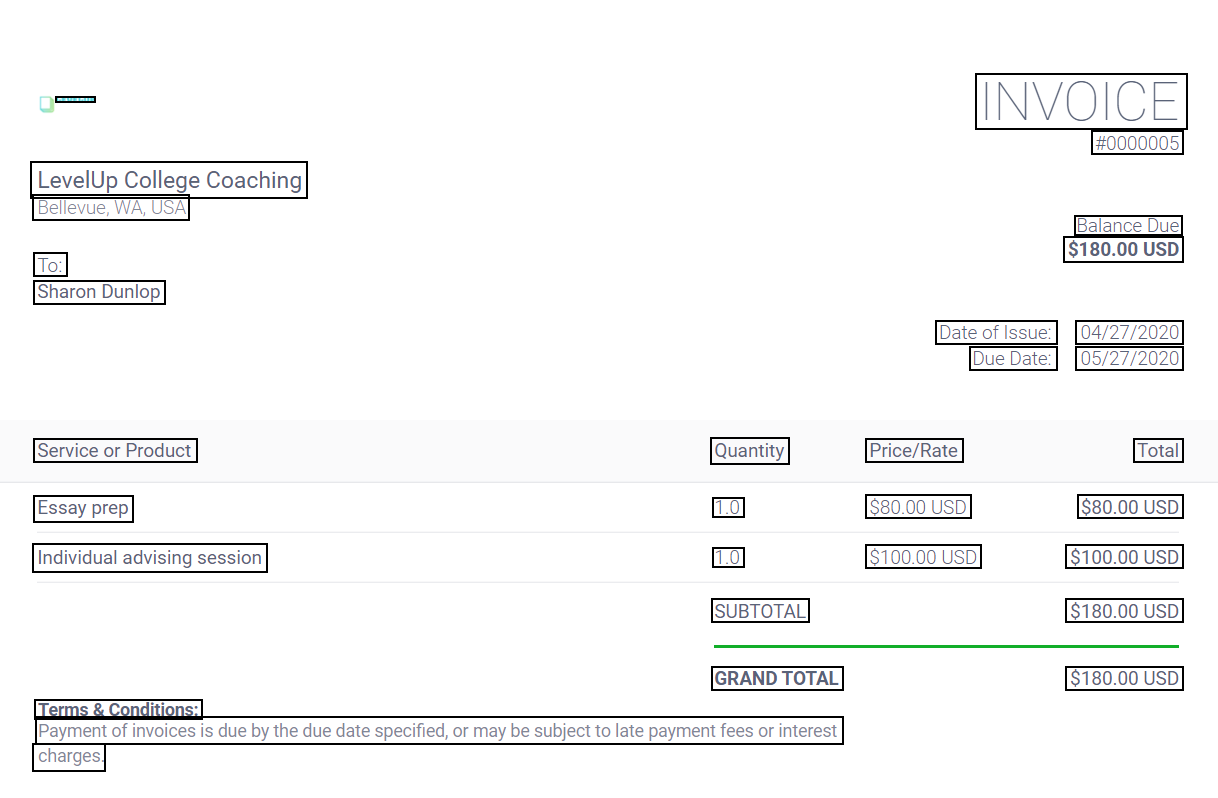

In [39]:
draw_boxes(img, newb)

In [40]:
for i  in newb:
  print(i[1])

INVOICE

#0000005
Levellp College Coaching
Bellevue, WA, USA
Balance Due
$180.00 USD
To:
Sharon Dunlop
Date of Issue:
04/27/2020
Due Date:
05/27/2020
Quantity
Service or Product
Price/Rate
Total
$80.00 USD
$80.00 USD
Essay prep
1.0
Individual advising session
$100.00 USD
$100.00 USD
1.0
SUBTOTAL
$180.00 USD
GRAND TOTAL
$180.00 USD
Terms & Conditions:
Payment of invoices is due bythe due date specified, or maybe subject to late payment fees or interest
charges
